In [1]:
import numpy as np
import pylab as plt
plt.style.use('ggplot')
import astropy.units as au
import os

import gpflow as gp
from gpflow.latent import Latent
from gpflow import settings
import logging
logging.basicConfig(format='%(asctime)s %(message)s')
import tensorflow as tf



/home/josh/anaconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/josh/anaconda3/envs/kerastf/lib/python3.6/site-packages/multipledispatch-0.4.9-py3.6.egg/multipledispatch/dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Linear, NoneType, Sum, InducingPoints], [Gaussian, Identity, NoneType, Kernel, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


# Some helper functions

In [2]:
from gpflow.actions import Loop, Action
from gpflow.training import AdamOptimizer

class PrintAction(Action):
    def __init__(self, model, text):
        self.model = model
        self.text = text
        
    def run(self, ctx):
        likelihood = ctx.session.run(self.model.likelihood_tensor)
        logging.warning('{}: iteration {} likelihood {:.4f}'.format(self.text, ctx.iteration, likelihood))
#         logging.warning(self.model)
        
def run_with_adam(model, lr,iterations, callback=None):
    
    adam = AdamOptimizer(lr).make_optimize_action(model)
    
    actions = [adam]#natgrad,
    actions = actions if callback is None else actions + [callback]

    Loop(actions, stop=iterations)()
    model.anchor(model.enquire_session())

# Define some data with input-dependent noise

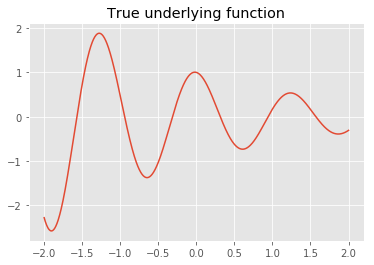

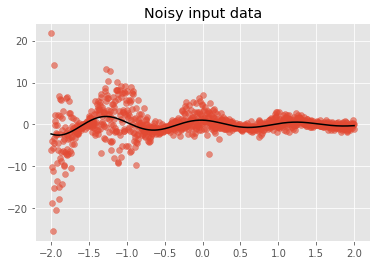

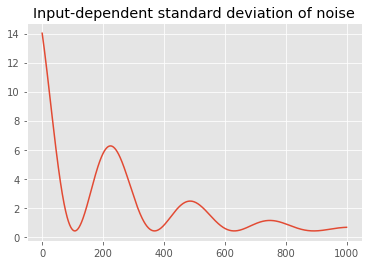

In [14]:
def func(X):
    return np.cos(5*X)*np.exp(-X/2)

N = 1000
X = np.linspace(-2,2,N)[:,None]
noise = 4*np.abs(0.25*(np.cos(6*X)+1)*np.exp(-X) + 0.1)
Y = func(X) + noise*np.random.normal(size=X.shape)

plt.plot(X[:,0],func(X)[:,0],alpha=1.)
plt.title("True underlying function")
plt.show()

plt.scatter(X[:,0],Y[:,0],alpha=0.6)
plt.plot(X[:,0],func(X)[:,0],alpha=1.,c='black')
plt.title("Noisy input data")
plt.show()
plt.title("Input-dependent standard deviation of noise")
plt.plot(noise)
plt.show()

# Define the HGP model and train

We will:
  - Define the latent GP that models the noise
  - Define heteroscedastic likelihood which uses the above latent
  - Define the HGP which has another independent latent modelling the
  underlying function
  - Finally, train with Adam and plot the results

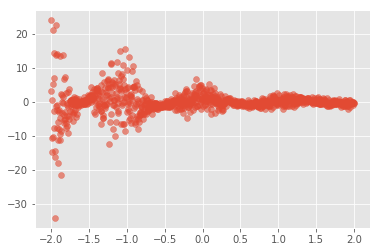

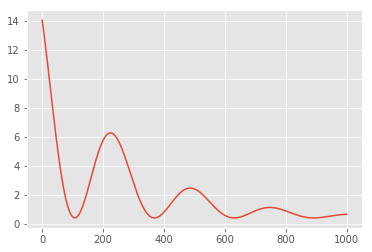

2018-04-30 16:33:29,596 Adam: iteration 0 likelihood -31346.3337
2018-04-30 16:33:29,747 Adam: iteration 1 likelihood -38708.0559
2018-04-30 16:33:29,856 Adam: iteration 2 likelihood -21581.9904
2018-04-30 16:33:29,940 Adam: iteration 3 likelihood -19811.6865
2018-04-30 16:33:29,987 Adam: iteration 4 likelihood -18606.0983
2018-04-30 16:33:30,070 Adam: iteration 5 likelihood -16021.4438
2018-04-30 16:33:30,136 Adam: iteration 6 likelihood -9459.9562
2018-04-30 16:33:30,193 Adam: iteration 7 likelihood -14868.5376
2018-04-30 16:33:30,256 Adam: iteration 8 likelihood -16849.2029
2018-04-30 16:33:30,382 Adam: iteration 9 likelihood -39256.1801
2018-04-30 16:33:30,559 Adam: iteration 10 likelihood -29577.7805
2018-04-30 16:33:30,729 Adam: iteration 11 likelihood -32697.2196
2018-04-30 16:33:30,796 Adam: iteration 12 likelihood -7096.2292
2018-04-30 16:33:30,860 Adam: iteration 13 likelihood -21275.6727
2018-04-30 16:33:30,919 Adam: iteration 14 likelihood -25833.6581
2018-04-30 16:33:30,97

2018-04-30 16:33:38,160 Adam: iteration 125 likelihood -22893.2001
2018-04-30 16:33:38,220 Adam: iteration 126 likelihood -20022.4648
2018-04-30 16:33:38,305 Adam: iteration 127 likelihood -60725.4493
2018-04-30 16:33:38,365 Adam: iteration 128 likelihood -10319.7782
2018-04-30 16:33:38,422 Adam: iteration 129 likelihood -7160.0325
2018-04-30 16:33:38,468 Adam: iteration 130 likelihood -34901.9631
2018-04-30 16:33:38,500 Adam: iteration 131 likelihood -37553.1754
2018-04-30 16:33:38,537 Adam: iteration 132 likelihood -12587.3159
2018-04-30 16:33:38,583 Adam: iteration 133 likelihood -9149.2312
2018-04-30 16:33:38,624 Adam: iteration 134 likelihood -7223.6842
2018-04-30 16:33:38,664 Adam: iteration 135 likelihood -10116.8598
2018-04-30 16:33:38,703 Adam: iteration 136 likelihood -15159.6539
2018-04-30 16:33:38,741 Adam: iteration 137 likelihood -26195.5115
2018-04-30 16:33:38,785 Adam: iteration 138 likelihood -8667.9339
2018-04-30 16:33:38,827 Adam: iteration 139 likelihood -10756.2970

2018-04-30 16:33:44,210 Adam: iteration 248 likelihood -4332.3041
2018-04-30 16:33:44,264 Adam: iteration 249 likelihood -5161.9855
2018-04-30 16:33:44,306 Adam: iteration 250 likelihood -5275.3907
2018-04-30 16:33:44,353 Adam: iteration 251 likelihood -24242.4846
2018-04-30 16:33:44,389 Adam: iteration 252 likelihood -15514.8797
2018-04-30 16:33:44,432 Adam: iteration 253 likelihood -3129.6330
2018-04-30 16:33:44,468 Adam: iteration 254 likelihood -9473.0840
2018-04-30 16:33:44,509 Adam: iteration 255 likelihood -7580.1754
2018-04-30 16:33:44,556 Adam: iteration 256 likelihood -12360.6358
2018-04-30 16:33:44,613 Adam: iteration 257 likelihood -17901.3610
2018-04-30 16:33:44,684 Adam: iteration 258 likelihood -12311.3561
2018-04-30 16:33:44,738 Adam: iteration 259 likelihood -3019.5332
2018-04-30 16:33:44,780 Adam: iteration 260 likelihood -10032.6442
2018-04-30 16:33:44,827 Adam: iteration 261 likelihood -21254.1966
2018-04-30 16:33:44,905 Adam: iteration 262 likelihood -11004.1729
20

2018-04-30 16:33:50,532 Adam: iteration 372 likelihood -22530.3810
2018-04-30 16:33:50,571 Adam: iteration 373 likelihood -26839.5020
2018-04-30 16:33:50,593 Adam: iteration 374 likelihood -4054.3171
2018-04-30 16:33:50,615 Adam: iteration 375 likelihood -20393.1604
2018-04-30 16:33:50,899 Adam: iteration 376 likelihood -10830.4818
2018-04-30 16:33:50,935 Adam: iteration 377 likelihood -8750.0199
2018-04-30 16:33:50,971 Adam: iteration 378 likelihood -7060.0875
2018-04-30 16:33:51,016 Adam: iteration 379 likelihood -7798.7375
2018-04-30 16:33:51,049 Adam: iteration 380 likelihood -33692.4795
2018-04-30 16:33:51,102 Adam: iteration 381 likelihood -8271.6443
2018-04-30 16:33:51,147 Adam: iteration 382 likelihood -9040.5255
2018-04-30 16:33:51,190 Adam: iteration 383 likelihood -6973.8445
2018-04-30 16:33:51,239 Adam: iteration 384 likelihood -11368.3965
2018-04-30 16:33:51,282 Adam: iteration 385 likelihood -9856.7826
2018-04-30 16:33:51,325 Adam: iteration 386 likelihood -18486.9913
201

2018-04-30 16:33:56,679 Adam: iteration 496 likelihood -8106.6678
2018-04-30 16:33:56,715 Adam: iteration 497 likelihood -4227.4880
2018-04-30 16:33:56,756 Adam: iteration 498 likelihood -5421.4760
2018-04-30 16:33:56,794 Adam: iteration 499 likelihood -3775.1542
2018-04-30 16:33:56,834 Adam: iteration 500 likelihood -4979.3564
2018-04-30 16:33:56,877 Adam: iteration 501 likelihood -10359.3254
2018-04-30 16:33:56,917 Adam: iteration 502 likelihood -6354.6787
2018-04-30 16:33:56,955 Adam: iteration 503 likelihood -20137.7953
2018-04-30 16:33:56,998 Adam: iteration 504 likelihood -10177.0087
2018-04-30 16:33:57,042 Adam: iteration 505 likelihood -5109.6856
2018-04-30 16:33:57,086 Adam: iteration 506 likelihood -11550.5215
2018-04-30 16:33:57,115 Adam: iteration 507 likelihood -13423.8290
2018-04-30 16:33:57,159 Adam: iteration 508 likelihood -6076.7028
2018-04-30 16:33:57,196 Adam: iteration 509 likelihood -11164.0804
2018-04-30 16:33:57,300 Adam: iteration 510 likelihood -22391.5676
201

2018-04-30 16:34:03,194 Adam: iteration 620 likelihood -4020.3363
2018-04-30 16:34:03,256 Adam: iteration 621 likelihood -9372.3353
2018-04-30 16:34:03,296 Adam: iteration 622 likelihood -7280.1385
2018-04-30 16:34:03,339 Adam: iteration 623 likelihood -5361.0768
2018-04-30 16:34:03,382 Adam: iteration 624 likelihood -13054.5811
2018-04-30 16:34:03,423 Adam: iteration 625 likelihood -2840.4897
2018-04-30 16:34:03,465 Adam: iteration 626 likelihood -2101.8956
2018-04-30 16:34:03,506 Adam: iteration 627 likelihood -3246.3530
2018-04-30 16:34:03,543 Adam: iteration 628 likelihood -2187.2427
2018-04-30 16:34:03,586 Adam: iteration 629 likelihood -34525.6806
2018-04-30 16:34:03,634 Adam: iteration 630 likelihood -4793.9022
2018-04-30 16:34:03,687 Adam: iteration 631 likelihood -4419.0581
2018-04-30 16:34:03,724 Adam: iteration 632 likelihood -14111.3100
2018-04-30 16:34:03,768 Adam: iteration 633 likelihood -3058.7540
2018-04-30 16:34:03,808 Adam: iteration 634 likelihood -2427.8491
2018-04

2018-04-30 16:34:09,524 Adam: iteration 745 likelihood -2343.4961
2018-04-30 16:34:09,571 Adam: iteration 746 likelihood -5647.9402
2018-04-30 16:34:09,612 Adam: iteration 747 likelihood -3270.3008
2018-04-30 16:34:09,656 Adam: iteration 748 likelihood -2142.8206
2018-04-30 16:34:09,684 Adam: iteration 749 likelihood -3313.9186
2018-04-30 16:34:09,728 Adam: iteration 750 likelihood -3005.4825
2018-04-30 16:34:09,771 Adam: iteration 751 likelihood -2880.3404
2018-04-30 16:34:09,809 Adam: iteration 752 likelihood -5440.0547
2018-04-30 16:34:09,865 Adam: iteration 753 likelihood -3086.5202
2018-04-30 16:34:09,916 Adam: iteration 754 likelihood -1601.6144
2018-04-30 16:34:09,951 Adam: iteration 755 likelihood -3628.8874
2018-04-30 16:34:10,006 Adam: iteration 756 likelihood -7504.2877
2018-04-30 16:34:10,061 Adam: iteration 757 likelihood -3709.0464
2018-04-30 16:34:10,113 Adam: iteration 758 likelihood -3338.7442
2018-04-30 16:34:10,171 Adam: iteration 759 likelihood -3362.5800
2018-04-30

2018-04-30 16:34:15,219 Adam: iteration 870 likelihood -3581.6850
2018-04-30 16:34:15,248 Adam: iteration 871 likelihood -2005.8527
2018-04-30 16:34:15,485 Adam: iteration 872 likelihood -3162.7774
2018-04-30 16:34:15,520 Adam: iteration 873 likelihood -2345.4416
2018-04-30 16:34:15,561 Adam: iteration 874 likelihood -1848.2298
2018-04-30 16:34:15,593 Adam: iteration 875 likelihood -2680.3406
2018-04-30 16:34:15,624 Adam: iteration 876 likelihood -2106.3986
2018-04-30 16:34:15,655 Adam: iteration 877 likelihood -1651.0215
2018-04-30 16:34:15,698 Adam: iteration 878 likelihood -2005.8375
2018-04-30 16:34:15,742 Adam: iteration 879 likelihood -2076.7741
2018-04-30 16:34:15,781 Adam: iteration 880 likelihood -3145.9321
2018-04-30 16:34:15,858 Adam: iteration 881 likelihood -2761.9838
2018-04-30 16:34:15,903 Adam: iteration 882 likelihood -2721.3178
2018-04-30 16:34:15,951 Adam: iteration 883 likelihood -2382.7416
2018-04-30 16:34:15,981 Adam: iteration 884 likelihood -1991.3253
2018-04-30

2018-04-30 16:34:21,152 Adam: iteration 995 likelihood -2326.4409
2018-04-30 16:34:21,186 Adam: iteration 996 likelihood -2126.6056
2018-04-30 16:34:21,214 Adam: iteration 997 likelihood -4812.7835
2018-04-30 16:34:21,240 Adam: iteration 998 likelihood -1906.6948
2018-04-30 16:34:21,267 Adam: iteration 999 likelihood -1772.3499


In [3]:
from gpflow.likelihoods import HeteroscedasticGaussian
from gpflow.models.hgp import HGP

settings.numerics.jitter_level=1e-6
iterations = 1000
Z = np.linspace(-2,2,100)[:,None]

with tf.Session(graph=tf.Graph()) as sess:
    with gp.defer_build():
        
        
        # Define the (log) noise latent
        mean = gp.mean_functions.Constant(np.log(0.5))
        kern = gp.kernels.RBF(1)
        log_noise_latent = Latent(Z, mean, kern, num_latent=1, whiten=False, name=None)
        # Define the likelihood
        likelihood = HeteroscedasticGaussian(log_noise_latent)
        # Define the underlying GP mean and kernel
        mean = gp.mean_functions.Zero()
        kernel = gp.kernels.RBF(1)
        # Create the HGP (note the slightly different order from SVGP)
        model = HGP(X, Y, Z, kernel, likelihood, 
                     mean_function=mean, 
                     minibatch_size=100,
                     num_latent = 1, 
                     num_samples=1,
                     num_data=None,
                     whiten=False)
        model.compile()
    
    run_with_adam(model,1e-3,iterations, PrintAction(model,"Adam"))
    # Predictions uses stochastic sampling and produces 
    # [num_samples,N,D] shape output
    ystar,varstar = model.predict_y(X, 100)
    # For plotting the noise
    hetero_noise = model.likelihood.compute_hetero_noise(X,100)

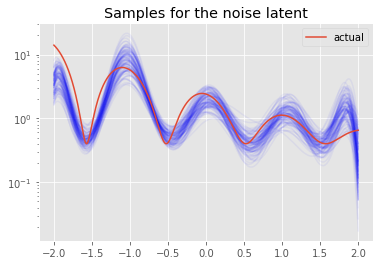

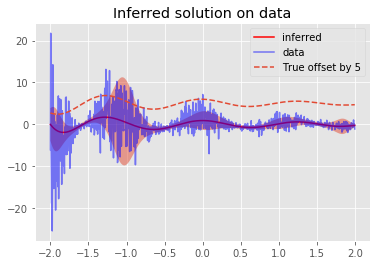

In [30]:
plt.plot(X[:,0],hetero_noise[:,:,0].T,alpha=0.05,c='b')
plt.title("Samples for the noise latent")
plt.plot(X[:,0],noise,label='actual')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(X[:,0],ystar.mean(0),alpha=1,c='r',label='inferred')
plt.fill_between(X[:,0],np.squeeze(ystar.mean(0)+np.sqrt(varstar.mean(0))),
                 np.squeeze(ystar.mean(0)-np.sqrt(varstar.mean(0))),
                 alpha=0.5)
plt.plot(X[:,0],Y[:,0],c='b',alpha=0.5,label='data')
plt.plot(X[:,0],func(X) + 5,ls='--',label='True offset by 5')
plt.legend()
plt.title("Inferred solution on data")
plt.show()